# Projet ml-in-the-clouds

## Imports

In [27]:
import pandas as pd
from pycaret.classification import *

In [28]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


import re
from collections import Counter
import random as r

In [29]:
df = pd.read_csv("emotions_train.csv")

## Introduction

`Projet Visant à prédire l'émotion de l'utilisateur lors de la rédaction d'un message sur les réseaux sociaux`

## Data Exploration

In [30]:
df.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i was so stubborn and that it took you getting...,joy
freq,2,7029


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

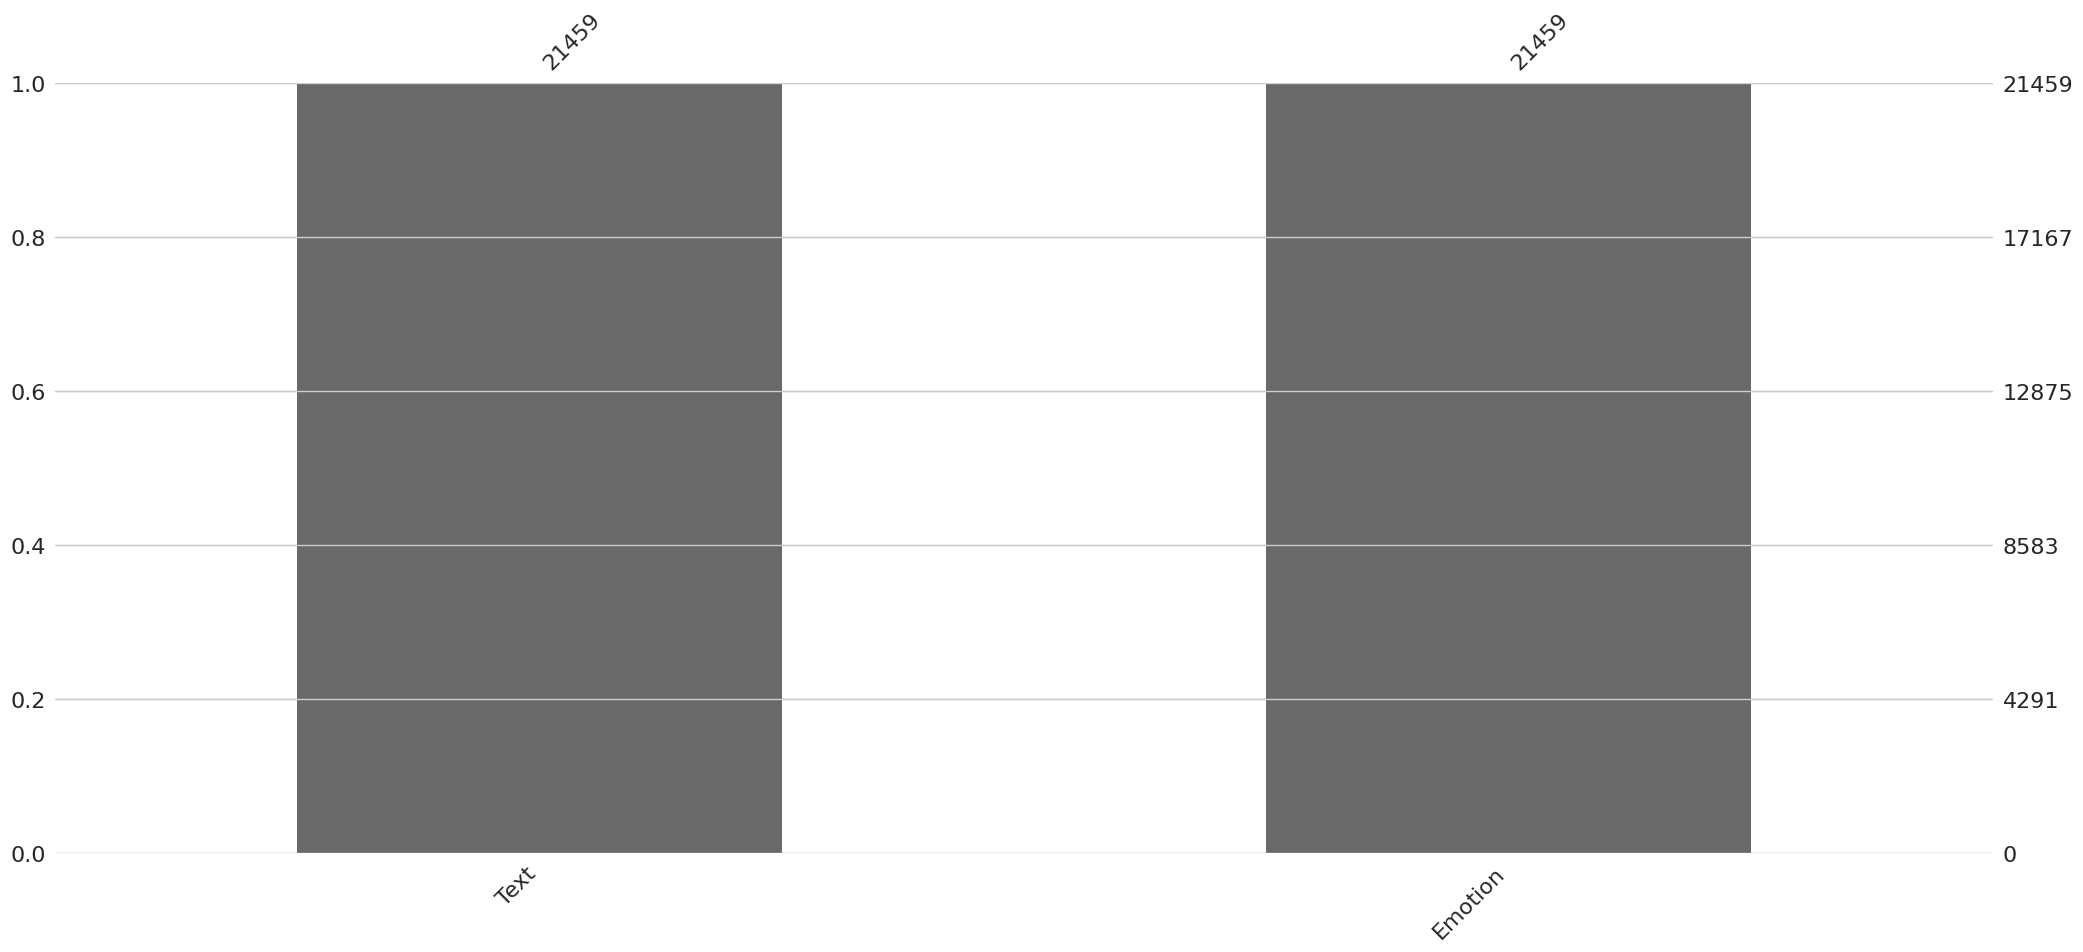

In [32]:
msno.bar(df, sort='ascending')

In [33]:
df.Emotion.value_counts()

Emotion
joy         7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: count, dtype: int64

## Data Cleaning

## Words exploration using Count

In [34]:
df.Text

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object

In [35]:
def extract_location_ml(location):
    stopwords = set(['I', 'DIDNT', 'AM','YOU', 'IM', 'THE', 'FROM', 'SO', 'GO', 'BUT', 'WAS', 'AT', 'HER', 'NOT', 'OF',\
        'TO', 'IN', 'THAT', 'WASN', 'ON', 'AND', 'MY', 'GET', 'BEEN', 'FOR', 'ME', 'A', 'IT', 'AN', 'WITH', 'TOO', 'AS', \
            'DO', 'IS', 'M', 'THEN', 'BY'])

    filtered_words = [word.upper() for word in re.findall(r'\b[A-Za-z]+\b', location) if word.upper() not in stopwords]
    word_counts = Counter(filtered_words)
    most_common_word = word_counts.most_common(10)
    if most_common_word:
        return most_common_word[0]
df["Test_Counters"] = df['Text'].apply(extract_location_ml)

# Test_Counters = df.Text.value_counts().reset_index().rename(columns={'count': 'compteur'})
# Test_Counters.head(16)
df["Test_Counters"]
temp_list = list(df["Test_Counters"])
r.shuffle(temp_list)
temp_list

[('SUMMER', 2),
 ('FEELING', 1),
 ('STILL', 1),
 ('VERY', 2),
 ('YEAST', 2),
 ('ALSO', 1),
 ('FEEL', 1),
 ('FEEL', 1),
 ('FEEL', 1),
 ('MUCH', 2),
 ('FEEL', 1),
 ('SUPPOSE', 1),
 ('FEEL', 1),
 ('GUESS', 1),
 ('FEEL', 2),
 ('HE', 2),
 ('COULD', 1),
 ('FEEL', 1),
 ('EXTREMELY', 1),
 ('FEEL', 1),
 ('FEEL', 1),
 ('FEEL', 1),
 ('LAURA', 1),
 ('PRACTICALLY', 1),
 ('OUR', 3),
 ('GAVE', 2),
 ('GOT', 1),
 ('BECAUSE', 2),
 ('ARE', 2),
 ('THINK', 1),
 ('FEEL', 1),
 ('FEEL', 1),
 ('ALMOST', 1),
 ('IVE', 1),
 ('HATE', 2),
 ('CAME', 1),
 ('WHERE', 2),
 ('ALWAYS', 1),
 ('LET', 2),
 ('FEELING', 1),
 ('FEELING', 1),
 ('WILL', 1),
 ('HIS', 2),
 ('LEFT', 1),
 ('BLOG', 2),
 ('FEEL', 1),
 ('FEEL', 1),
 ('IVE', 1),
 ('READY', 1),
 ('MORE', 3),
 ('KNOW', 1),
 ('USUALLY', 1),
 ('FEEL', 1),
 ('THIS', 3),
 ('GORENGS', 1),
 ('FEEL', 1),
 ('SAY', 2),
 ('FEELING', 1),
 ('FEEL', 1),
 ('FEELING', 1),
 ('HIM', 2),
 ('MUCH', 2),
 ('WISH', 1),
 ('HE', 2),
 ('BE', 2),
 ('FEEL', 1),
 ('TARTAN', 1),
 ('MUST', 1),
 ('FEELI

In [36]:
df[df.Text.apply(lambda x: x.lower().find("feel"))!=-1]

,Text,Emotion,Test_Counters
0,i didnt feel humiliated,sadness,"(FEEL, 1)"
1,i can go from feeling so hopeless to so damned...,sadness,"(CAN, 1)"
2,im grabbing a minute to post i feel greedy wrong,anger,"(GRABBING, 1)"
3,i am ever feeling nostalgic about the fireplac...,love,"(EVER, 1)"
4,i am feeling grouchy,anger,"(FEELING, 1)"
...,...,...,...
21201,"Far from experiencing simple gratitude , such ...",fear,"(FAR, 1)"
21202,She was still feeling a little anxious when sh...,fear,"(SHE, 4)"
21232,"Feeling thoroughly disquieted , she left her r...",fear,"(FEELING, 1)"
21272,"I do n't very often feel frightened , but then...",fear,"(N, 2)"


In [37]:
df.Emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [38]:
common_words_by_emotions_df = []
for emotion in df.Emotion.unique():
    df["Test_Counters"] = df['Text'][df.Emotion == emotion].apply(extract_location_ml)
    # Test_Counters = df.Text.value_counts().reset_index().rename(columns={'count': 'compteur'})
    # Test_Counters.head(16)
    print(df["Test_Counters"])


0        (FEEL, 1)
1         (CAN, 1)
2              NaN
3              NaN
4              NaN
           ...    
21454          NaN
21455          NaN
21456          NaN
21457          NaN
21458          NaN
Name: Test_Counters, Length: 21459, dtype: object
0                  NaN
1                  NaN
2        (GRABBING, 1)
3                  NaN
4         (FEELING, 1)
             ...      
21454              NaN
21455              NaN
21456              NaN
21457              NaN
21458              NaN
Name: Test_Counters, Length: 21459, dtype: object
0              NaN
1              NaN
2              NaN
3        (EVER, 1)
4              NaN
           ...    
21454          NaN
21455          NaN
21456          NaN
21457          NaN
21458          NaN
Name: Test_Counters, Length: 21459, dtype: object
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
21454    NaN
21455    NaN
21456    NaN
21457    NaN
21458    NaN
Name: Test_Counters, Length: 21459, 

## Discovering Pycaret

In [39]:
# import pycaret classification and init setup

s = setup(df, target = 'Emotion', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Emotion
2,Target type,Multiclass
3,Target mapping,"anger: 0, fear: 1, joy: 2, love: 3, sadness: 4, surprise: 5"
4,Original data shape,"(21459, 3)"
5,Transformed data shape,"(21459, 3)"
6,Transformed train set shape,"(15021, 3)"
7,Transformed test set shape,"(6438, 3)"
8,Categorical features,2
9,Rows with missing values,67.2%


Once the setup has been successfully executed it shows the information grid containing experiment level information.

Session id: A pseudo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions.

Target type: Binary, Multiclass, or Regression. The Target type is automatically detected.

Label Encoding: When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type.

Original data shape: Shape of the original data prior to any transformations.

Transformed train set shape : Shape of transformed train set

Transformed test set shape : Shape of transformed test set

Numeric features : The number of features considered as numerical.

Categorical features : The number of features considered as categorical.

In [40]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [41]:
exp.setup(df, target = 'Emotion', session_id = 124)

,Description,Value
0,Session id,124
1,Target,Emotion
2,Target type,Multiclass
3,Target mapping,"anger: 0, fear: 1, joy: 2, love: 3, sadness: 4, surprise: 5"
4,Original data shape,"(21459, 3)"
5,Transformed data shape,"(21459, 3)"
6,Transformed train set shape,"(15021, 3)"
7,Transformed test set shape,"(6438, 3)"
8,Categorical features,2
9,Rows with missing values,67.2%


# Motherfucking way too long to execute

In [42]:
# best = compare_models()

In [43]:
# Specify the models to include in the comparison
models_to_compare = ['lr', 'knn', 'qda', 'lda'] #'lightgbm'

# Setup the classification task
clf_setup = setup(data=df, target='Emotion', session_id=43, fold=100)

# Compare the specified models
best_model = compare_models(include=models_to_compare)


,Description,Value
0,Session id,43
1,Target,Emotion
2,Target type,Multiclass
3,Target mapping,"anger: 0, fear: 1, joy: 2, love: 3, sadness: 4, surprise: 5"
4,Original data shape,"(21459, 3)"
5,Transformed data shape,"(21459, 3)"
6,Transformed train set shape,"(15021, 3)"
7,Transformed test set shape,"(6438, 3)"
8,Categorical features,2
9,Rows with missing values,67.2%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.3275,0.0000,0.3275,0.1126,0.1621,0.0003,0.0016,0.2164
qda,Quadratic Discriminant Analysis,0.3273,0.0000,0.3273,0.1215,0.1674,0.0089,0.0166,0.0288
lda,Linear Discriminant Analysis,0.3269,0.0000,0.3269,0.1125,0.1619,-0.0003,-0.0007,0.0295
knn,K Neighbors Classifier,0.3174,0.6314,0.3174,0.3393,0.2916,0.2088,0.3389,0.0380


In [44]:
# models()['Name'].index

In [45]:
model_tags = ['lr', 'knn', 'nb', 'dt', 'svm', 'rbfsvm', 'gpc', 'rf',\
       'qda', 'ada', 'gbc', 'lda', 'et', 'dummy'] # long ass mf 'mlp', 'lightgbm' # banned 'ridge'

# Setup the classification task
clf_setup = setup(data=df, target='Emotion', session_id=43, fold=5)

# Compare the specified models
best_model = compare_models(include=model_tags)

save_model(best_model, 'first_best_model')


,Description,Value
0,Session id,43
1,Target,Emotion
2,Target type,Multiclass
3,Target mapping,"anger: 0, fear: 1, joy: 2, love: 3, sadness: 4, surprise: 5"
4,Original data shape,"(21459, 3)"
5,Transformed data shape,"(21459, 3)"
6,Transformed train set shape,"(15021, 3)"
7,Transformed test set shape,"(6438, 3)"
8,Categorical features,2
9,Rows with missing values,67.2%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.5333,0.0000,0.5333,0.4632,0.4404,0.3329,0.4394,0.8080
svm,SVM - Linear Kernel,0.3460,0.0000,0.3460,0.3799,0.3045,0.2229,0.3534,0.0840
lr,Logistic Regression,0.3276,0.0000,0.3276,0.2002,0.1622,0.0003,0.0063,0.2300
dummy,Dummy Classifier,0.3275,0.5000,0.3275,0.1073,0.1616,0.0000,0.0000,0.0820
lda,Linear Discriminant Analysis,0.3272,0.0000,0.3272,0.2001,0.1620,-0.0000,0.0004,0.0560
rbfsvm,SVM - Radial Kernel,0.3272,0.0000,0.3272,0.2001,0.1620,-0.0000,0.0004,0.3780
nb,Naive Bayes,0.3259,0.5862,0.3259,0.2456,0.1883,0.0423,0.0732,0.0540
ada,Ada Boost Classifier,0.3231,0.0000,0.3231,0.3367,0.2412,0.1271,0.2078,0.1180
knn,K Neighbors Classifier,0.3184,0.6609,0.3184,0.3817,0.2652,0.1661,0.2738,0.1000
rf,Random Forest Classifier,0.3178,0.6845,0.3178,0.4273,0.2922,0.2092,0.3400,0.5000


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                                     transformer=TargetEncoder(cols=['Text',
                                                                     'Test

In [46]:
tune_model(best_model, optimize = 'Accuracy', n_iter=20, choose_better=True, early_stopping = True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=43, solver='auto',
                tol=0.0001)

In [47]:
lightgbm = create_model('lightgbm', fold = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3199,0.7240,0.3199,0.4744,0.2935,0.2113,0.3427
1,0.3157,0.7200,0.3157,0.4739,0.2906,0.2074,0.3386
Mean,0.3178,0.7220,0.3178,0.4742,0.2920,0.2093,0.3406
Std,0.0021,0.0020,0.0021,0.0003,0.0015,0.0020,0.0021


# can do  save=True on plot_model

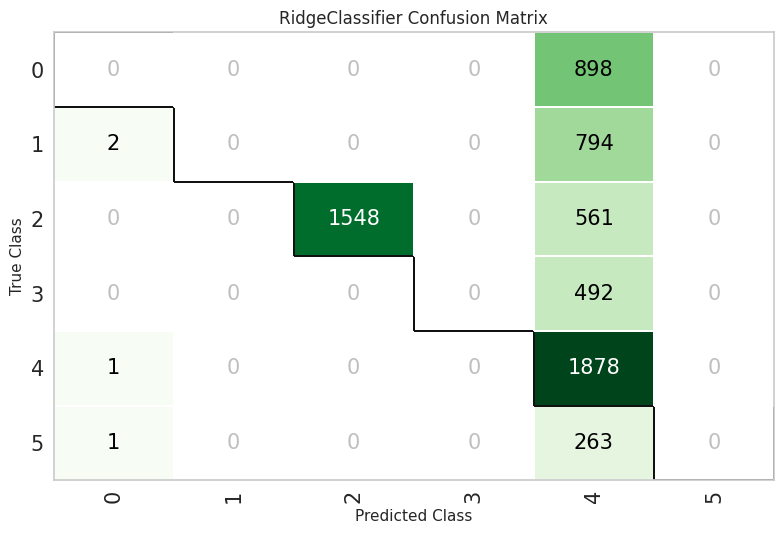

In [48]:
# plot confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

In [49]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

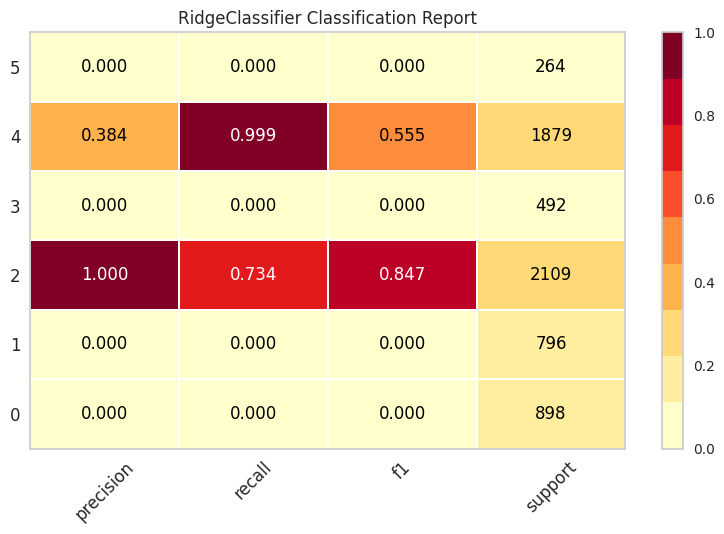

In [50]:
# plot Classification Report
plot_model(best_model, plot = 'class_report') # control size scale = 2  save=True

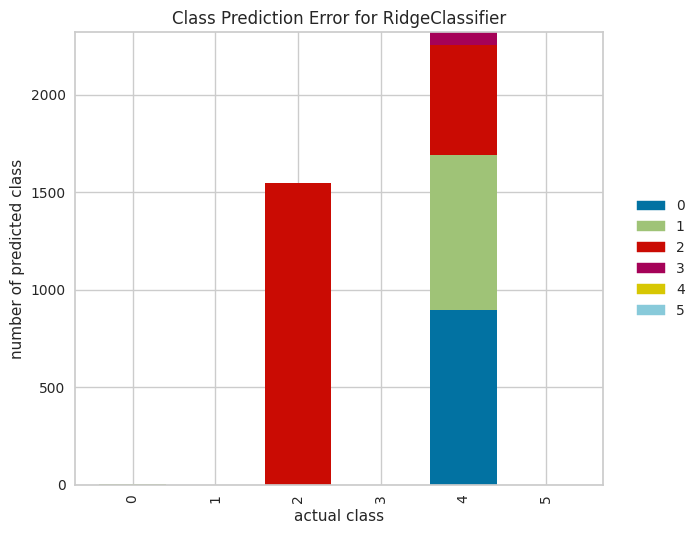

In [51]:
# plot Class Prediction Error
plot_model(best_model, plot = 'error')

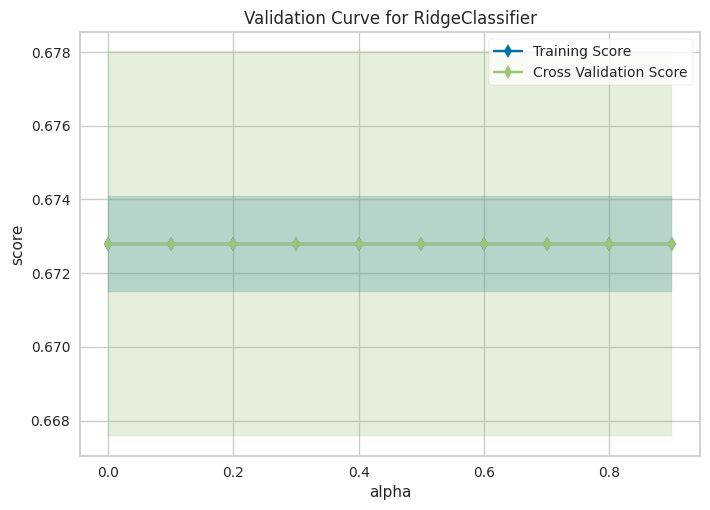

In [52]:
# plot Class Validation Curve
plot_model(best_model, plot = 'vc')

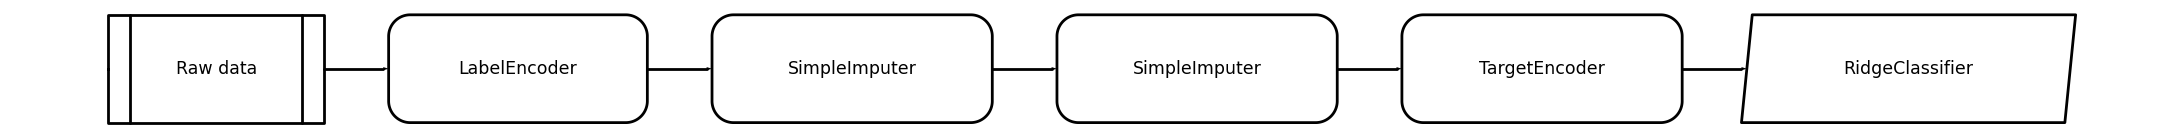

In [53]:
# plot Schematic drawing of the preprocessing pipeline
plot_model(best_model, plot = 'pipeline')

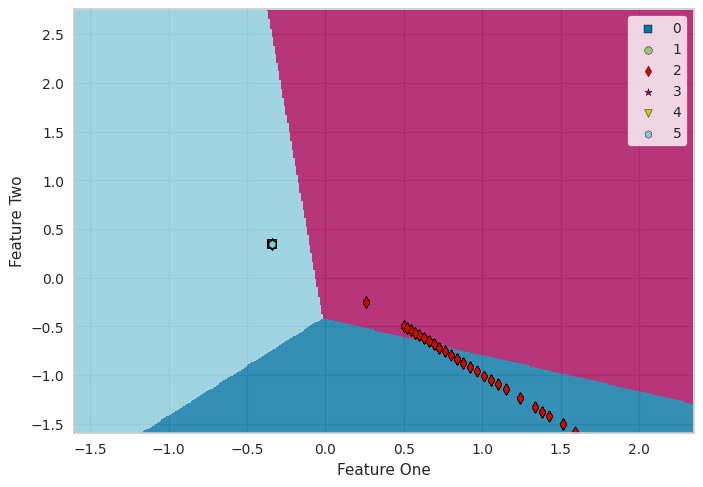

In [54]:
# plot Decision Boundary
plot_model(best_model, plot = 'boundary')

In [55]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [56]:
# predict on test set
holdout_pred = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.5322,0,0.5322,0.4398,0.4394,0.3313,0.4379


In [57]:
holdout_pred.head()

,Text,Test_Counters,Emotion,prediction_label
17734,im feeling absolutely amazing,NaN,surprise,sadness
14965,i feel convinced that i am on the brink of som...,"(FEEL, 1)",joy,sadness
1679,i feel times less bitchy,NaN,anger,sadness
1586,im feeling adventurous and my laundry hamper,"(FEELING, 1)",joy,joy
14905,i feel terrible and sexist whenever im in a gr...,NaN,sadness,sadness


In [58]:
# save pipeline
save_model(best_model, 'current_best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                                     transformer=TargetEncoder(cols=['Text',
                                                                     'Test

In [59]:
# load pipeline
loaded_best_pipeline = load_model('current_best_model')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='...
                                    transformer=TargetEncoder(cols=['Text',
                                                                    'Test_Counters'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              hierarchy=None,
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0))),
                ('trained_model',
                 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True,
                                 fit_intercept=True, max_iter=None,
                                 positive=False, random_state=43, solver='auto',
                                 tol=0.0001))],
         verbose=False)

In [60]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [61]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.5322,0,0.5322,0.4398,0.4394,0.3313,0.4379


In [62]:
# from pycaret.classification import *
# s = setup(data, target = 'Class variable', log_experiment='mlflow', experiment_name='iris_experiment')
# compare models
# best = compare_models()

In [63]:
# start mlflow server on localhost:5000
# !mlflow ui

In [64]:
# start mlflow server on localhost:5000
# !mlflow ui

In [65]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:30:53
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3278,0.0000,0.3278,0.2311,0.1623,0.0006,0.0178
1,0.3279,0.0000,0.3279,0.3086,0.1630,0.0008,0.0120
2,0.3272,0.0000,0.3272,0.1073,0.1616,-0.0004,-0.0062
3,0.3276,0.0000,0.3276,0.2468,0.1623,0.0002,0.0036
4,0.3276,0.0000,0.3276,0.1074,0.1618,0.0002,0.0023
Mean,0.3276,0.0000,0.3276,0.2002,0.1622,0.0003,0.0059
Std,0.0002,0.0000,0.0002,0.0801,0.0005,0.0004,0.0083


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=43, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3248,0.7034,0.3248,0.4590,0.2971,0.2162,0.3482
1,0.3186,0.6981,0.3186,0.5356,0.2933,0.2099,0.3403
2,0.3139,0.6941,0.3139,0.3343,0.2891,0.2055,0.3362
3,0.3219,0.7006,0.3219,0.4743,0.2951,0.2131,0.3444
4,0.3093,0.6258,0.3093,0.3333,0.2859,0.2009,0.3301
Mean,0.3177,0.6844,0.3177,0.4273,0.2921,0.2091,0.3398
Std,0.0056,0.0295,0.0056,0.0805,0.0041,0.0054,0.0063


In [67]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3275,0.5000,0.3275,0.1072,0.1616,0.0000,0.0000
1,0.3269,0.4996,0.3269,0.1072,0.1614,-0.0010,-0.0201
2,0.3276,0.4999,0.3276,0.1073,0.1617,0.0000,0.0005
3,0.3276,0.5000,0.3276,0.1073,0.1616,0.0000,0.0000
4,0.3276,0.4996,0.3276,0.1074,0.1618,0.0001,0.0009
Mean,0.3274,0.4998,0.3274,0.1073,0.1616,-0.0002,-0.0037
Std,0.0003,0.0002,0.0003,0.0001,0.0001,0.0004,0.0082


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [68]:
# # define tuning grid
# dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# # tune model with custom grid and metric = F1
# tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

In [69]:
# # define tuning grid
# dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# # tune model with custom grid and metric = F1
# tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

For more details on all available search_library and search_algorithm please check the docstring.

 Some other parameters that you might find very useful in tune_model are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [70]:
# get leaderboard
lb = get_leaderboard()
lb

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.3276,0.0000,0.3276,0.2002,0.1622,0.0003,0.0063
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.3184,0.6609,0.3184,0.3817,0.2652,0.1661,0.2738
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.3259,0.5862,0.3259,0.2456,0.1883,0.0423,0.0732
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.3177,0.6844,0.3177,0.4273,0.2921,0.2091,0.3398
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.3460,0.0000,0.3460,0.3799,0.3045,0.2229,0.3534
5,SVM - Radial Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.3272,0.0000,0.3272,0.2001,0.1620,-0.0000,0.0004
6,Ridge Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5333,0.0000,0.5333,0.4632,0.4404,0.3329,0.4394
7,Random Forest Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.3178,0.6845,0.3178,0.4273,0.2922,0.2092,0.3400
8,Quadratic Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.2883,0.0000,0.2883,0.2002,0.1627,0.0423,0.0721


## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [71]:
automl()

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=43, solver='auto',
                tol=0.0001)

In [72]:
!pip install explainerdashboard
!pip install gradio

In [73]:
!pip install explainerdashboard

In [74]:
# dashboard function
dashboard(dt, display_format ='inline')

Note: model_output=='probability', so assuming that raw shap output of DecisionTreeClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_

In [75]:
# create gradio app
create_app(best_model)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [76]:
# create api
create_api(best_model, api_name = 'my_first_api')
# run this command python my_first_api.py

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [77]:
# !python my_first_api.py

In [78]:
# check out the .py file created with this magic command
# %load my_first_api.py

In [79]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [81]:
!docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .

invalid argument "IMAGE_NAME:IMAGE_TAG" for "-t, --tag" flag: invalid reference format: repository name must be lowercase
See 'docker image build --help'.


In [82]:
final_best = finalize_model(best_model)

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [83]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [84]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [85]:
# save model
save_model(best_model, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                                     transformer=TargetEncoder(cols=['Text',
                                                                     'Test

In [102]:
# load model
loaded_model = load_model('my_first_model')
loaded_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='...
                                    transformer=TargetEncoder(cols=['Text',
                                                                    'Test_Counters'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              hierarchy=None,
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0))),
                ('trained_model',
                 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True,
                                 fit_intercept=True, max_iter=None,
                                 positive=False, random_state=43, solver='auto',
                                 tol=0.0001))],
         verbose=False)

In [103]:
# save experiment
# save_experiment('my_experiment')

In [100]:
# load experiment from disk
# exp_from_disk = load_experiment('my_experiment', data=df)

In [99]:
custom_tweets = ["You're a big piece of shit", "Ima bury your grandma", "Tryna strike a chord and it's probably a minor", \
    "I wish you the worst", "I'm wishing for you to get a happy drive by for new year !"]

self_made_data = pd.DataFrame(custom_tweets, columns=['Test'])
self_made_data

,Test
0,You're a big piece of shit
1,Ima bury your grandma
2,Tryna strike a chord and it's probably a minor
3,I wish you the worst
4,I'm wishing for you to get a happy drive by fo...


In [105]:
predictions = predict_model(loaded_model, data=self_made_data) #tuned_model # first param is best_model

KeyError: "None of [Index(['Text', 'Test_Counters'], dtype='object')] are in the [columns]"

In [ ]:
predictions = predict_model(loaded_from_disk, data="Ima bury your grandma")

In [95]:
predictions = predict_model(loaded_from_disk, data="Tryna strike a chord and it's probably a minor")

AttributeError: 'str' object has no attribute 'columns'